# Анализ данных в задаче кредитного скоринга

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл: 

* LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6:  задолженность,  BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь 
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре 
* default - индикатор невозврата денежных средств

# Задание 

1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:   a)  о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки  b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.  Значимы ли полученные результаты с практической точки зрения?
2. Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается.  Хорошо, если вы предоставите несколько различных решений  этой задачи (с помощью доверительного интервала и подходящего статистического критерия)
3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.  Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?  Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг ? наоборт, не отдаст долг ?
4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.
5. Возраст (AGE): Относительно двух групп людей  вернувших и не вернувших кредит  проверьте следующие гипотезы:   a)  о равенстве медианных значений возрастов людей   b) о равенстве распределений  с помощью одного из подходящих непараметрических критериев проверки равенства средних.  Значимы ли полученные результаты с практической точки зрения ?

# Review criteria

1. Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.
2. При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.
3. При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость. 
4. Выполненное задание необходимо представить в ipython-ноутбука.

----------------------------

# Решение

Импорт библиотек и данных, общие проверки данных.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportion_confint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('credit_card_default_analysis.csv', index_col='ID')

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

Выше видно, что нет null значений.

In [5]:
# преобразование данных для экономии памяти
cols_to_int8 = ['SEX', 'EDUCATION', 'MARRIAGE', 'default']
cols_to_int16 = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[cols_to_int8] = df[cols_to_int8].astype('int8')
df[cols_to_int16] = df[cols_to_int16].astype('int16')

In [6]:
df.info(verbose=False, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Columns: 24 entries, LIMIT_BAL to default
dtypes: int16(6), int64(14), int8(4)
memory usage: 3.9 MB


In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Оценим сбалансированность выборки по категориальным признакам:

In [8]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default']

for col in categorical_columns:
    print('{} количество и доля значений:'.format(col))
    cc_df = pd.concat([df[col].value_counts(), df[col].value_counts(normalize=True)], axis=1)
    cc_df.columns = ['Количество', 'Доля']
    print(cc_df)
    print('------------------------------')

SEX количество и доля значений:
   Количество      Доля
2       18112  0.603733
1       11888  0.396267
------------------------------
EDUCATION количество и доля значений:
   Количество      Доля
2       14030  0.467667
1       10585  0.352833
3        4917  0.163900
5         280  0.009333
4         123  0.004100
6          51  0.001700
0          14  0.000467
------------------------------
MARRIAGE количество и доля значений:
   Количество      Доля
2       15964  0.532133
1       13659  0.455300
3         323  0.010767
0          54  0.001800
------------------------------
default количество и доля значений:
   Количество    Доля
0       23364  0.7788
1        6636  0.2212
------------------------------


<b>Вывод:</b>

Всегда полезно оценить среднее и дисперсии некоторых признаков в начале анализа данных:

* Среднее значение выданно кредита ≈ 167484, с достаточно большой дисперсией ≈ 129747
* Средний возраст заемщика ≈ 35.5, с дисперсией ≈ 9
* Доля дефолтных заемщиков ≈ 0.22

Выборка НЕ сбалансирована по целевому признку default  - индикатору невозврата денежных средств, но количества значений достаточно для анализа.

Признаки MARRIAGE и EDUCATION особенно НЕ сбалансированы, так как есть значения признака, где количество небольшое в выборке.

-----------------------

## Задача 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:
* a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки
* b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Значимы ли полученные результаты с практической точки зрения?

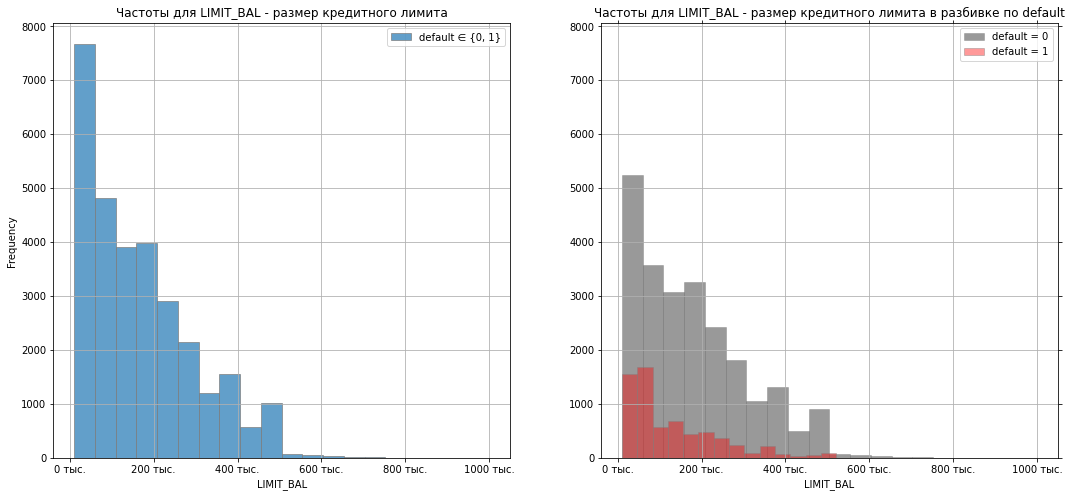

In [9]:
col_analyzed = 'LIMIT_BAL'
col_target = 'default'


# форматер осей в тысячах
def funcFormatterThousand(x, pos):
    return u'{:.0f} тыс.'.format(x // 1000)
formatterThousand = FuncFormatter(funcFormatterThousand)


# создание фигуры и подграфиков
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


# гистограмма для LIMIT_BAL
df[col_analyzed].plot.hist(bins=20, ax=axes[0], alpha=0.7,  edgecolor='grey', label='default ∈ {0, 1}')
axes[0].set_title('Частоты для {} - размер кредитного лимита'.format(col_analyzed))
axes[0].set_xlabel(col_analyzed)
axes[0].legend()
axes[0].grid()
axes[0].xaxis.set_major_formatter(formatterThousand)


# гистограмма для LIMIT_BAL в разбивке по default == 0
df.loc[df[col_target] == 0, col_analyzed].plot.hist(bins=20, ax=axes[1], color='black', alpha=0.4, edgecolor='grey',
                                                    label='default = 0')
# гистограмма для LIMIT_BAL в разбивке по default == 1
df.loc[df[col_target] == 1, col_analyzed].plot.hist(bins=20, ax=axes[1], color='red', alpha=0.4,  edgecolor='grey',
                                                    label='default = 1')
axes[1].tick_params(axis='both', reset=True)
axes[1].set_title('Частоты для {} - размер кредитного лимита в разбивке по {}'.format(col_analyzed, col_target))
axes[1].set_xlabel(col_analyzed)
axes[1].legend()
axes[1].grid()
axes[1].xaxis.set_major_formatter(formatterThousand)


# другие форматеры осей для пробы

# axes[1].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axes[1].xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

# sf = ScalarFormatter()
# sf.set_powerlimits((-10, 10))
# axes[1].xaxis.set_major_formatter(sf)

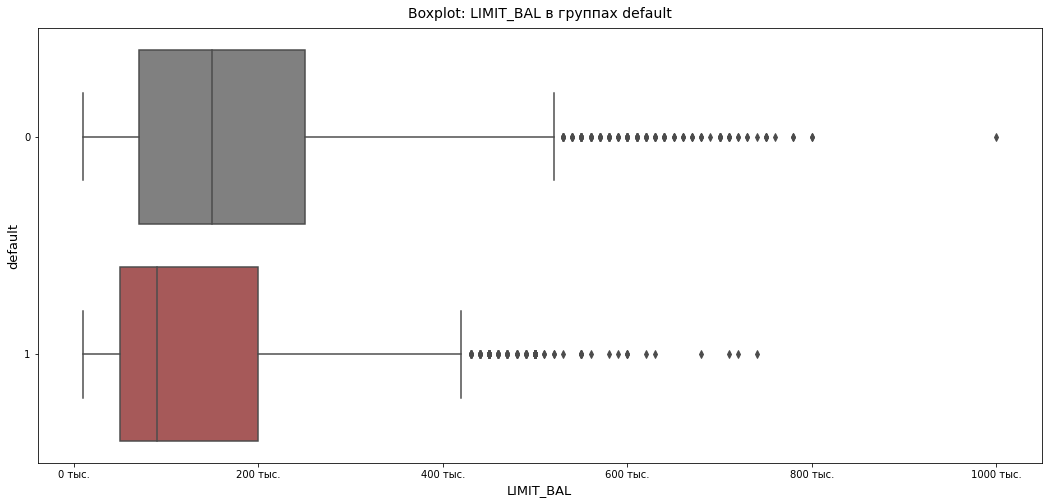

In [10]:
# настраиваем область для графиков
fig, axes = plt.subplots(1, 1, sharey=True, figsize = (18, 8))

# # отображаю boxplot
sns.boxplot(x=col_analyzed, y=col_target, data=df, ax=axes, orient='h', palette=['grey', 'red'], saturation=0.3)
axes.set_xlabel(col_analyzed, fontsize=13)
axes.set_ylabel(col_target, fontsize=13)
axes.set_title(label='Boxplot: {} в группах {}'.format(col_analyzed, col_target), fontdict={'fontsize': 14}, pad=10)
axes.xaxis.set_major_formatter(formatterThousand);

<b>Вывод по графикам:</b>

* Кредиты до 200 тыс. преобладают в портфеле банка.
* Визуально можно оценить, что процент невозврата для кредитов снижается с ростом размера кредитного лимита LIMIT_BAL.
* То есть если судить по анекдоту "Если вы должны банку 100 долларов - это ваши проблемы. Если вы должны банку миллион долларов, то это уже проблемы банка.", то большая доля проблем у вас, хотя у банка тоже есть серьезные проблемы.
* Распределение LIMIT_BAL для группы вернувших кредит более плавно стремится к нулю при росте LIMIT_BAL, нежели для группы кредит не вернувший, где сперва идет резкое падение частот на уровне примерно 40 тыс., а потом почти плавное снижение к нулю с ростом LIMIT_BAL, другими словами распределение не вернувших кредит более позитивно скошено (positive skew).
* Медиана группы не вернувших кредит чуть менее 100 тыс., медиана группы вернувших кредит в районе 150 тыс.

### Проверьте гипотезы:

#### a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

Проверять будем следующее:

* Гипотеза H0: медианные значения LIMIT_BAL равны для групп default
* Альтернатива H1: медианные значения LIMIT_BAL отличаются для групп default

In [11]:
# получаем данные по каждой группе default
LIMIT_BAL_d0 = df.loc[df[col_target] == 0, col_analyzed].values
LIMIT_BAL_d1 = df.loc[df[col_target] == 1, col_analyzed].values

In [12]:
# выводим значение медиан для групп
print('Медиана признака {} в группе {}=0 : {:.0f}'.format(col_analyzed, col_target, np.median(LIMIT_BAL_d0))) 
print('Медиана признака {} в группе {}=1 : {:.0f}'.format(col_analyzed, col_target, np.median(LIMIT_BAL_d1))) 

Медиана признака LIMIT_BAL в группе default=0 : 150000
Медиана признака LIMIT_BAL в группе default=1 : 90000


Как говорилось в материалах в лекции о доверительных интервалах:
    
«<b>Построение доверительных интервалов на основе бутстрепа</b>

Часто возникает необходимость построить интервальную оценку для некоторой не очень удобной статистики,
про распределение которой ничего не известно. Это могут быть квантили (например, медиана) или сочетание
известных статистик (например, отношение долей).»

То есть для "неудобной" медианы из возможных вариантов интервальной оценки, подходит только <b>бутстреп</b>.

##### Bootstrap

In [13]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [14]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

##### Bootstrap для LIMIT_BAL

In [15]:
np.random.seed(0)

LIMIT_BAL_d0_median_scores = np.median(get_bootstrap_samples(LIMIT_BAL_d0, 1000), axis=1)
LIMIT_BAL_d1_median_scores = np.median(get_bootstrap_samples(LIMIT_BAL_d1, 1000), axis=1)

print('95% confidence interval признака LIMIT_BAL в группе default=0 :',  stat_intervals(LIMIT_BAL_d0_median_scores, 0.05))
print('95% confidence interval признака LIMIT_BAL в группе default=1 :',  stat_intervals(LIMIT_BAL_d1_median_scores, 0.05))

95% confidence interval признака LIMIT_BAL в группе default=0 : [150000. 150000.]
95% confidence interval признака LIMIT_BAL в группе default=1 : [80000. 90000.]


##### Точечная оценка разности медиан для LIMIT_BAL

In [16]:
print('Разность медиан LIMIT_BAL :', np.median(LIMIT_BAL_d0) - np.median(LIMIT_BAL_d1))

Разность медиан LIMIT_BAL : 60000.0


##### Интервальная оценка разности медиан

In [17]:
delta_LIMIT_BAL_median_scores =  LIMIT_BAL_d0_median_scores - LIMIT_BAL_d1_median_scores

print("95% confidence interval для разности медиан LIMIT_BAL :",  stat_intervals(delta_LIMIT_BAL_median_scores, 0.05))

95% confidence interval для разности медиан LIMIT_BAL : [60000. 70000.]


#### Вывод по пункту: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

* Медианы НЕ совпадают, доверительные интервалы НЕ совпадают, интервальная оценка разности медиан достаточно большая.
* Медиана группы НЕплатильщиков значительно меньше, то есть риск невозврата кредита больше для заемщиков с меньшей суммой кредитного лимита.

### Проверьте гипотезы:

#### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Воспользуемся <b>перестановочным критерием для независимых выборок</b>

Проверять будем следующее:

* Гипотеза H0: распределения средних LIMIT_BAL равны для групп default
*  Альтернатива H1: распределения средних LIMIT_BAL для групп default отличаются на величину сдвига △ <≠> 0

##### Функции для перестановочного критерия для независимых выборок

In [18]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [19]:
def get_random_combinations(n1, n2, max_combinations):
#     index = range(n1 + n2)
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [20]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [21]:
def permutation_test(sample1, sample2, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

##### Проверка гипотезы пункта b

In [22]:
np.random.seed(0)
print('p-value: {:.5f}'.format(permutation_test(LIMIT_BAL_d0, LIMIT_BAL_d1,
                                                max_permutations=1000, alternative='two-sided')))

p-value: 0.00100


#### Вывод по пункту: b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

* Нулевая гипотеза о равестве распределения средних LIMIT_BAL уверенно отвергается на уровне значимости 0.05

#### Практическая значимость результата для LIMIT_BAL:

In [23]:
print('Медиана признака {} в группе {}=0 : {:.0f}'.format(col_analyzed, col_target, np.median(LIMIT_BAL_d0))) 
print('Медиана признака {} в группе {}=1 : {:.0f}'.format(col_analyzed, col_target, np.median(LIMIT_BAL_d1))) 
print('Разность медиан : {:.0f}'.format(np.median(LIMIT_BAL_d0) - np.median(LIMIT_BAL_d1)))

Медиана признака LIMIT_BAL в группе default=0 : 150000
Медиана признака LIMIT_BAL в группе default=1 : 90000
Разность медиан : 60000


<b>Вывод:</b> практическая значимость результата LIMIT_BAL существенна, так как разница медиан 60 тысяч, что значимо для бизнеса.

-----------------

## Задача 2

Пол (SEX): 

* Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

SEX: пол клиента (1 = мужской, 2 = женский )

In [24]:
col_analyzed = 'SEX'
col_target = 'default'

df_sex_val_counts = df[col_analyzed].value_counts().sort_index(ascending=False)
df_sex_val_counts

2    18112
1    11888
Name: SEX, dtype: int64

In [25]:
# сводная таблица по SEX и default
df_sex_pivot = pd.pivot_table(df[['SEX', 'default', 'LIMIT_BAL']],
                          values=['LIMIT_BAL'], index=['SEX'], columns=['default'],
                          fill_value = 0, aggfunc='count').sort_index(ascending=False)
df_sex_pivot.columns.names = [None, None]
df_sex_pivot.columns = df_sex_pivot.columns.set_levels(['default'], level=0)

df_sex_pivot

default      
          0     1
SEX              
2     14349  3763
1      9015  2873

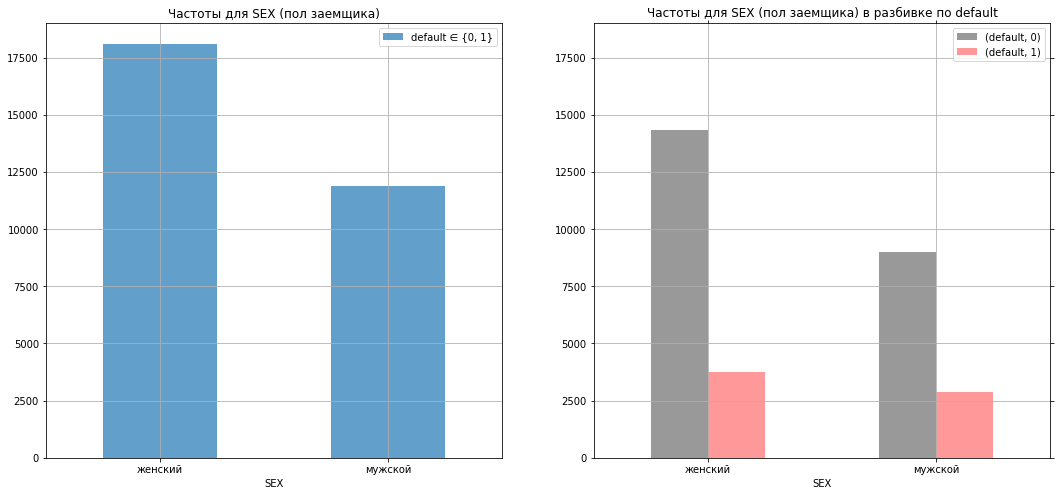

In [26]:
col_analyzed = 'SEX'
col_target = 'default'


# форматер осей в тысячах
def funcFormatterSex(x, pos):
    sex_d = {1: 'мужской', 2: 'женский'}
    if x in {1, 2}:
        return u'{}'.format(sex_d[x])
    else:
        return u'женский'
formatterSex = FuncFormatter(funcFormatterSex)


# создание фигуры и подграфиков
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


# барчарт для LIMIT_BAL
df_sex_val_counts.plot.bar(ax=axes[0], alpha=0.7, label='default ∈ {0, 1}')
axes[0].set_title('Частоты для {} (пол заемщика)'.format(col_analyzed))
axes[0].set_xlabel(col_analyzed)
axes[0].legend()
axes[0].grid()
axes[0].tick_params(axis='x', labelrotation = 0)
axes[0].xaxis.set_major_formatter(formatterSex)


# барчарт для LIMIT_BAL в разбивке по default == 0
df_sex_pivot.plot.bar(ax=axes[1], alpha=0.4, color=['black', 'red'])
axes[1].tick_params(axis='both', reset=True)
axes[1].set_title('Частоты для {} (пол заемщика) в разбивке по {}'.format(col_analyzed, col_target))
axes[1].set_xlabel(col_analyzed)
axes[1].legend()
axes[1].grid()
axes[1].tick_params(axis='x', labelrotation = 0)
axes[1].xaxis.set_major_formatter(formatterSex)

<b>Вывод по графикам:</b>

* Число заемщиков женского пола примерно на треть больше чем мужского.
* Визуально можно оценить, что доля невозврата для кредитов меньше у женщин. Ниже проверил, процент невозврата у женщин 26%, у мужчин 32%.

In [27]:
print('Доля невозврата в зависимости от SEX (пола) :')
df_sex_pivot[('default', 1)] / df_sex_pivot[('default', 0)]

Доля невозврата в зависимости от SEX (пола) :


SEX
2    0.262248
1    0.318691
dtype: float64

### Проверьте гипотезу:

о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [28]:
# получаем данные по каждой группе default
SEX_d0 = df.loc[df[col_target] == 0, col_analyzed].values
SEX_d1 = df.loc[df[col_target] == 1, col_analyzed].values

In [29]:
# вычисляем долю женщин в каждой группе

SEX_d0_w_perc = np.sum(SEX_d0 == 2) / len(SEX_d0)
SEX_d1_w_perc = np.sum(SEX_d1 == 2) / len(SEX_d1)

print('Доля женщин в группе {}=0 : {}'.format(col_target, SEX_d0_w_perc))
print('Доля женщин в группе {}=1 : {}'.format(col_target, SEX_d1_w_perc))

Доля женщин в группе default=0 : 0.6141499743194658
Доля женщин в группе default=1 : 0.5670584689572031


То есть, доля женщин в группе невозврата кредита меньше.

#### a) проверка гипотезы о гендерном составе групп с помощью доверительного интервала.

Так как доли мужчин и женщин примерно равны, то можно использовать как доверительный интервал для нормального распределения, так и доверительный интервал Уилсона. Попробуем, оба способа и еще построим разность двух долей.

##### Доверительный интервал для нормального распределения по группам default

In [30]:
norm_int_SEX_d0 = proportion_confint(np.sum(SEX_d0 == 2), len(SEX_d0), method = 'normal')
norm_int_SEX_d1 = proportion_confint(np.sum(SEX_d1 == 2), len(SEX_d1), method = 'normal')

print('Доверительный интервал  доли женщин в {} для {}=0 :'.format(col_analyzed, col_target), norm_int_SEX_d0)
print('Доверительный интервал доли женщин в {} для {}=1 :'.format(col_analyzed, col_target), norm_int_SEX_d1)

Доверительный интервал  доли женщин в SEX для default=0 : (0.6079080143666044, 0.6203919342723273)
Доверительный интервал доли женщин в SEX для default=1 : (0.5551371736238107, 0.5789797642905956)


<b>Вывод:</b> интервалы для доли женщин не пересекаются, следовательно, гипотеза о равенстве гендерного состава групп отвергается на уровне значимости 0.05.

##### Доверительный интервал Уилсона по группам default

In [31]:
norm_int_SEX_d0 = proportion_confint(np.sum(SEX_d0 == 2), len(SEX_d0), method = 'wilson')
norm_int_SEX_d1 = proportion_confint(np.sum(SEX_d1 == 2), len(SEX_d1), method = 'wilson')

print('Доверительный интервал доли женщин в {} для {}=0 :'.format(col_analyzed, col_target), norm_int_SEX_d0)
print('Доверительный интервал доли женщин в {} для {}=1 :'.format(col_analyzed, col_target), norm_int_SEX_d1)

Доверительный интервал доли женщин в SEX для default=0 : (0.607889734030124, 0.6203726841910749)
Доверительный интервал доли женщин в SEX для default=1 : (0.5551017630282817, 0.578937581965066)


<b>Вывод:</b> такой же. Интервалы для доли женщин не пересекаются, следовательно, гипотеза о равенстве гендерного состава групп отвергается на уровне значимости 0.05.

##### Разность долей женщин в группах

In [32]:
# функция для разности двух долей

def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

In [33]:
SEX_diff_interval = proportions_confint_diff_ind(np.abs(SEX_d0 - 1), np.abs(SEX_d1 - 1))
print('Доверительный интервал для разности долей женщин в в группах {}  :'.format(col_target), SEX_diff_interval)

Доверительный интервал для разности долей женщин в в группах default  : (0.03363493274962867, 0.060548077974896725)


<b>Вывод:</b> доверительный интервал для разности долей женщин в группах не содержит ноль и положителен, следовательно доля женщин в группе отдавщих кредит больще и статистически значима на уровне значимости 0.05.

#### b) проверка гипотезы о гендерном составе групп с помощью подходящего статистического критерия.

Так как выборки независимы и их случайные величины имеют распределение $X ∼ Ber(p)$ и нулевое распределение $Z(X_1, X_2) ∼ N(0, 1)$, то можно воспользоваться <b>Z-критерием для доли для двух независимых выборок</b>.

* Гипотеза H0: гендерный состав не отличается в группах default
* Альтернатива H1: гендерный состав отличается в группах default

In [34]:
# фнукции для Z-критерия для доли для двух независимых выборок

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [35]:
SEX_diff_z_pvalue = proportions_diff_z_test(proportions_diff_z_stat_ind(np.abs(SEX_d0 - 2), np.abs(SEX_d1 - 2)),
                                            alternative='two-sided')

print('p-value для нулевой гепотезы: ', SEX_diff_z_pvalue)

p-value для нулевой гепотезы:  4.472866521609831e-12


<b>Вывод:</b> нулевая гипотеза отвергается на уровне значимости 0.05, то есть гендерный состав в группах отличается.

#### Практическая значимость результата для SEX:

In [36]:
print('Доля женщин в группе {}=0 : {:.4f}'.format(col_target, SEX_d0_w_perc))
print('Доля женщин в группе {}=1 : {:.4f}'.format(col_target, SEX_d1_w_perc))
print('Разность доли женщин в группах : {:.4f}'.format(SEX_d0_w_perc - SEX_d1_w_perc))

Доля женщин в группе default=0 : 0.6141
Доля женщин в группе default=1 : 0.5671
Разность доли женщин в группах : 0.0471


<b>Вывод:</b> практическая значимость результата SEX существенна, так как разница между долей в группах около 5%, что значимо для бизнеса.

-----------------

## Задача 3

Образование (EDUCATION):

* Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.
* Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. 
* Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?
* Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг?

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5 = прочее; 6 = нет данных ).

In [37]:
col_analyzed = 'EDUCATION'
col_target = 'default'

# количество заемщиков с различным образованием
df_education_val_counts = df[col_analyzed].value_counts().sort_index(ascending=True)
df_education_val_counts

# количество заемщиков с различным образованием
print('{} количество и доля значений:'.format(col_analyzed))
cc_df = pd.concat([df[col_analyzed].value_counts(), df[col_analyzed].value_counts(normalize=True)], axis=1).sort_index()
cc_df.columns = ['Количество', 'Доля']
cc_df

EDUCATION количество и доля значений:


,Количество,Доля
0,14,0.000467
1,10585,0.352833
2,14030,0.467667
3,4917,0.163900
4,123,0.004100
5,280,0.009333
6,51,0.001700


Предварительная ремарка для <b>практической значимости результата</b> в анализе EDUCATION:

* Практический результат будет значим если отличия в уровнях образования будут статистически значимы и практически отличаться в группах default для типов образовния с большой долей в выборке, т.е. для 1 = магистр; 2 = бакалавр; 3 = выпускник школы. Для всех остальных значений EDUCATION если результат будет статистически значим и будут различия по группам default, то с точки зрения бизнеса - их суммарная доля примерно 1.4%, и значимость будет несущественна, почти при любом раскладе.

In [38]:
# сводная таблица по EDUCATION и default
df_education_pivot = pd.pivot_table(df[[col_analyzed, col_target, 'LIMIT_BAL']],
                          values=['LIMIT_BAL'], index=[col_analyzed], columns=[col_target],
                          fill_value = 0, aggfunc='count').sort_index(ascending=False).sort_index()
df_education_pivot.columns.names = [None, None]
df_education_pivot.columns = df_sex_pivot.columns.set_levels(['default'], level=0)

df_education_pivot

default      
                0     1
EDUCATION              
0              14     0
1            8549  2036
2           10700  3330
3            3680  1237
4             116     7
5             262    18
6              43     8

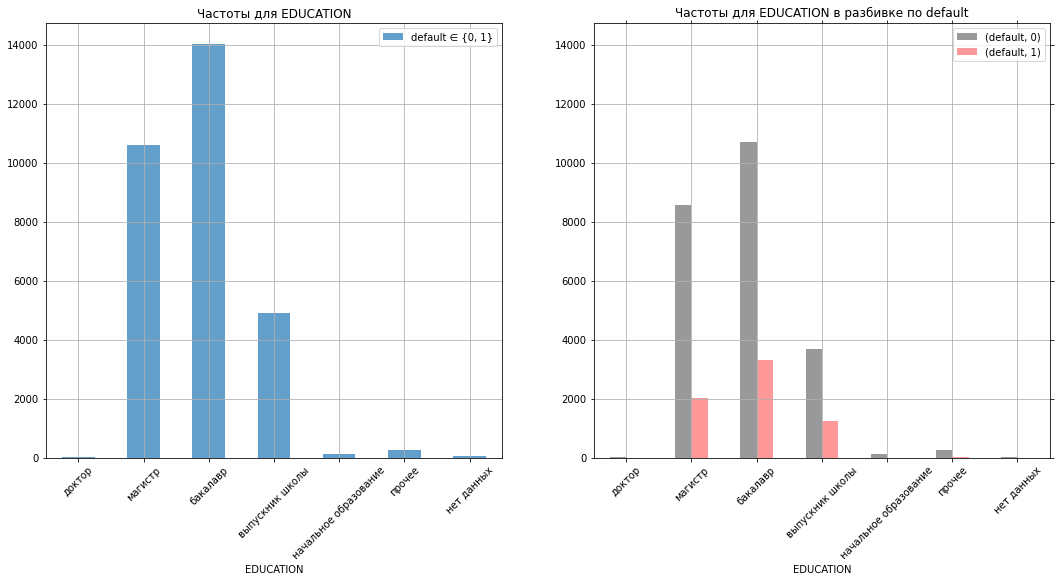

In [39]:
# форматер осей в тысячах
def funcFormatterEducation(x, pos):
    educ_d = {0: 'доктор', 1: 'магистр', 2: 'бакалавр', 3: 'выпускник школы', 
              4: 'начальное образование', 5: 'прочее', 6: 'нет данных'}
    if x in educ_d:
        return u'{}'.format(educ_d[x])
    else:
        return u''
funcFormatterEducation = FuncFormatter(funcFormatterEducation)


# создание фигуры и подграфиков
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


# барчарт для LIMIT_BAL
df_education_val_counts.plot.bar(ax=axes[0], alpha=0.7, label='default ∈ {0, 1}')
axes[0].set_title('Частоты для {}'.format(col_analyzed))
axes[0].set_xlabel(col_analyzed)
axes[0].legend()
axes[0].grid()
axes[0].tick_params(axis='x', labelrotation = 45)
axes[0].xaxis.set_major_formatter(funcFormatterEducation)


# барчарт для LIMIT_BAL в разбивке по default == 0
df_education_pivot.plot.bar(ax=axes[1], alpha=0.4, color=['black', 'red'])
axes[1].tick_params(axis='both', reset=True)
axes[1].set_title('Частоты для {} в разбивке по {}'.format(col_analyzed, col_target))
axes[1].set_xlabel(col_analyzed)
axes[1].legend()
axes[1].grid()
axes[1].tick_params(axis='x', labelrotation = 45)
axes[1].xaxis.set_major_formatter(funcFormatterEducation)

In [40]:
# в столбце proportion доля НЕвозвратов для соответствующего образования

df_education_pivot['proportion'] = df_education_pivot.loc[:, 'default'][1] / df_education_pivot.loc[:, 'default'].sum(axis=1)
df_education_pivot

default       proportion
                0     1           
EDUCATION                         
0              14     0   0.000000
1            8549  2036   0.192348
2           10700  3330   0.237349
3            3680  1237   0.251576
4             116     7   0.056911
5             262    18   0.064286
6              43     8   0.156863

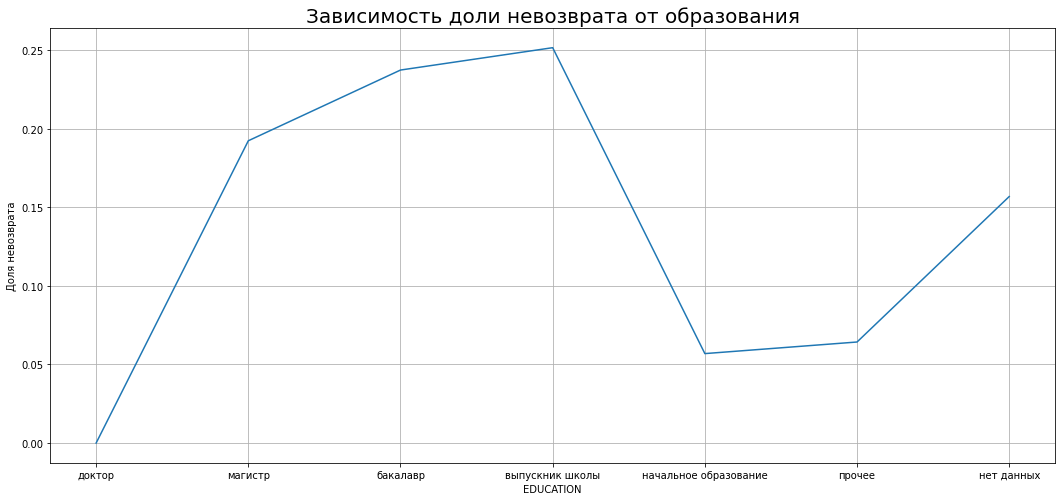

In [41]:
# настраиваем область для графиков
fig, axes = plt.subplots(1, 1, sharey=True, figsize = (18, 8))

df_education_pivot['proportion'].plot.line(ax=axes)
axes.set_title('Зависимость доли невозврата от образования', fontsize=20)
axes.set_ylabel('Доля невозврата')
axes.xaxis.set_major_formatter(funcFormatterEducation)
axes.grid()

<b>Вывод по графикам:</b>

* Доля невозврата у заемщиков с разным образованием отличается достаточно сильно.
* Доля невозврата по образованию с большой долей в выборке, т.е. для 1 = магистр; 2 = бакалавр; 3 = выпускник школы, не сильно отличается, но все же различия существенны, примерно 19% у магистров и 25% у выпускников школы.

### Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.

Предположим, что если образование не влияет на возврат кредита, тогда воспользуемся критерием V-Крамера и проверим гипотезы о равенстве нулю критерия V-Крамера.

* Гипотеза H0: образование НЕ влияет на возврат кредита
* Альтернатива H1: образование влияет на возврат кредита

##### Проверка применимости критерия Крамера:

* Нужно, чтобы выборки были достаточно большими: n ≥ 40. 
* Кроме того, необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5, не более, чем в 20% ячеек.

In [42]:
# Нужно, чтобы выборки были достаточно большими: n ≥ 40
print('Условие выполнено :', len(df) > 40)

Условие выполнено : True


Кроме того, необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5, не более, чем в 20% ячеек.

Расчитаем ожидаемые значения для матрицы сопряженности, сгруппируем их в столбцы <b>expected</b>.

Ожидаемые значения меньше 5 записывается так: $(\frac{n_{i+}n_{+j}}{n} < 5)$, где $n_{i+}$ - сумма по строке, $n_{+j}$ - сумма по столбцу.

In [43]:
# df_education_pivot['proportion'] = df_education_pivot.loc[:, 'default'][1] / df_education_pivot.loc[:, 'default'][0]
df_education_pivot[('expected', 0)] = df_education_pivot[[('default', 0), ('default', 1)]].sum(axis=1) \
                                        * df_education_pivot[('default', 0)].sum() / len(df)
df_education_pivot[('expected', 1)] = df_education_pivot[[('default', 0), ('default', 1)]].sum(axis=1) \
                                        * df_education_pivot[('default', 1)].sum() / len(df)

df_education_pivot

default       proportion    expected           
                0     1                      0          1
EDUCATION                                                
0              14     0   0.000000     10.9032     3.0968
1            8549  2036   0.192348   8243.5980  2341.4020
2           10700  3330   0.237349  10926.5640  3103.4360
3            3680  1237   0.251576   3829.3596  1087.6404
4             116     7   0.056911     95.7924    27.2076
5             262    18   0.064286    218.0640    61.9360
6              43     8   0.156863     39.7188    11.2812

In [44]:
vkramer_check = np.sum(np.array(df_education_pivot['expected'] < 5)) * 100 \
                    / (df_education_pivot['expected'].shape[0] * df_education_pivot['expected'].shape[1])

print('Процент ячеек где ожидаемое количество < 5 : {:.1f}%'.format(vkramer_check))

Процент ячеек где ожидаемое количество < 5 : 7.1%


Процент меньше 20%, то есть можно применять критерий C-Крамера.

##### Проверка гипотезы Крамера:

In [45]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [46]:
df_education_pivot['default']

,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [47]:
print ("V-Cramer statistic is: %.4f" % cramers_stat(np.array(df_education_pivot['default'])))
print ("p-value:", stats.chi2_contingency(np.array(df_education_pivot['default']))[1])

V-Cramer statistic is: 0.0738
p-value: 1.2332626245415605e-32


<b>Вывод:</b> нулевая гипотеза отвергается, то есть образование влияет на возврат кредита. Значение статистики V-Крамера небольшое, то есть корреляция есть, но не сильная.

<b>Практическая значимость:</b> если взять доли невозврата для 1 = магистр; 2 = бакалавр; 3 = выпускник школы, то разница в 4% и 2% процента существенна в объеме числа заемщиков этих групп.

### Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. 

* Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. 
* Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?
* Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборт, не отдаст долг?

Столбцы:

* default - наблюдаемые значения
* expected - ожидаемые значения

In [48]:
df_education_diff = df_education_pivot[['default', 'expected']]
df_education_diff

default          expected           
                0     1           0          1
EDUCATION                                     
0              14     0     10.9032     3.0968
1            8549  2036   8243.5980  2341.4020
2           10700  3330  10926.5640  3103.4360
3            3680  1237   3829.3596  1087.6404
4             116     7     95.7924    27.2076
5             262    18    218.0640    61.9360
6              43     8     39.7188    11.2812

Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек.

In [49]:
df_education_diff['expected']

,0,1
EDUCATION,,
0,10.9032,3.0968
1,8243.5980,2341.4020
2,10926.5640,3103.4360
3,3829.3596,1087.6404
4,95.7924,27.2076
5,218.0640,61.9360
6,39.7188,11.2812


In [50]:
df_education_diff[('default-expected', 0)] = df_education_diff['default'][0] - df_education_diff['expected'][0]
df_education_diff[('default-expected', 1)] = df_education_diff['default'][1] - df_education_diff['expected'][1]
df_education_diff

default          expected            default-expected          
                0     1           0          1                0         1
EDUCATION                                                                
0              14     0     10.9032     3.0968           3.0968   -3.0968
1            8549  2036   8243.5980  2341.4020         305.4020 -305.4020
2           10700  3330  10926.5640  3103.4360        -226.5640  226.5640
3            3680  1237   3829.3596  1087.6404        -149.3596  149.3596
4             116     7     95.7924    27.2076          20.2076  -20.2076
5             262    18    218.0640    61.9360          43.9360  -43.9360
6              43     8     39.7188    11.2812           3.2812   -3.2812

Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости?

Можно ввести нормировку на ожидаемое значение, то есть разделить на него.

In [51]:
df_education_diff[('default-expected-normed', 0)] = df_education_diff['default-expected'][0] / df_education_diff['expected'][0]
df_education_diff[('default-expected-normed', 1)] = df_education_diff['default-expected'][1] / df_education_diff['expected'][1]
df_education_diff

default          expected            default-expected            \
                0     1           0          1                0         1   
EDUCATION                                                                   
0              14     0     10.9032     3.0968           3.0968   -3.0968   
1            8549  2036   8243.5980  2341.4020         305.4020 -305.4020   
2           10700  3330  10926.5640  3103.4360        -226.5640  226.5640   
3            3680  1237   3829.3596  1087.6404        -149.3596  149.3596   
4             116     7     95.7924    27.2076          20.2076  -20.2076   
5             262    18    218.0640    61.9360          43.9360  -43.9360   
6              43     8     39.7188    11.2812           3.2812   -3.2812   

          default-expected-normed            
                                0         1  
EDUCATION                                    
0                        0.284027 -1.000000  
1                        0.037047 -0.130436  
2                       -0.020735  0.073004  
3                       -0.039004  0.137324  
4                        0.210952 -0.742719  
5                        0.201482 -0.709377  
6                        0.082611 -0.290856

Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? Ищем в столбце default-expected-normed[0] максимальное значение.

<b>Ответ:</b> образование доктор.

наоборт, не отдаст долг? Ищем в столбце default-expected-normed[1] максимальное значение.

<b>Ответ:</b> образование выпускник школы.

--------------------

## Задача 4

Семейное положение (MARRIAGE):

* Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

In [52]:
col_analyzed = 'MARRIAGE'
col_target = 'default'

# количество заемщиков с различным образованием
df_marriage_val_counts = df[col_analyzed].value_counts().sort_index(ascending=True)
df_marriage_val_counts

# количество заемщиков с различным образованием
print('{} количество и доля значений:'.format(col_analyzed))
cc_df = pd.concat([df[col_analyzed].value_counts(), df[col_analyzed].value_counts(normalize=True)], axis=1).sort_index()
cc_df.columns = ['Количество', 'Доля']
cc_df

MARRIAGE количество и доля значений:


,Количество,Доля
0,54,0.001800
1,13659,0.455300
2,15964,0.532133
3,323,0.010767


Предварительная ремарка для <b>практической значимости результата</b> в анализе MARRIAGE:

* Практический результат будет значим если отличия в уровнях образования будут статистически значимы и практически отличаться в группах default для типов MARRIAGE с большой долей в выборке, т.е. для 1 = замужем/женат, 2 = холост. Для всех остальных значений MARRIAGE если результат будет статистически значим и будут различия по группам default, то с точки зрения бизнеса - их суммарная доля примерно 1%, и значимость будет несущественна, почти при любом раскладе.

In [53]:
# сводная таблица по EDUCATION и default
df_marriage_pivot = pd.pivot_table(df[[col_analyzed, col_target, 'LIMIT_BAL']],
                          values=['LIMIT_BAL'], index=[col_analyzed], columns=[col_target],
                          fill_value = 0, aggfunc='count').sort_index(ascending=False).sort_index()
df_marriage_pivot.columns.names = [None, None]
df_marriage_pivot.columns = df_sex_pivot.columns.set_levels(['default'], level=0)

df_marriage_pivot

default      
               0     1
MARRIAGE              
0             49     5
1          10453  3206
2          12623  3341
3            239    84

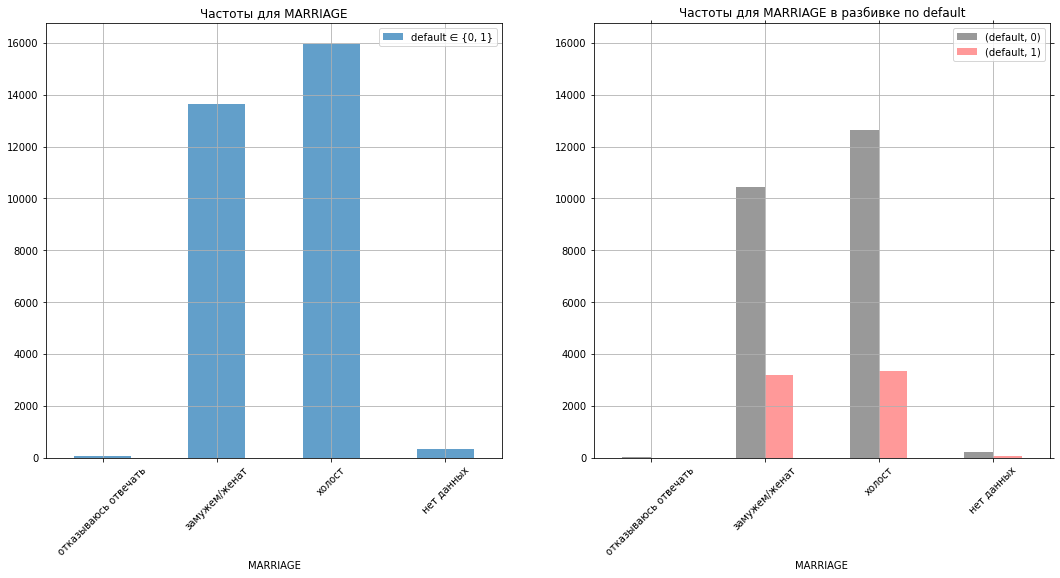

In [54]:
# форматер осей в тысячах
def funcFormatterMarriage(x, pos):
    educ_d = {0: 'отказываюсь отвечать', 1: 'замужем/женат', 2: 'холост', 3: 'нет данных'}
    if x in educ_d:
        return u'{}'.format(educ_d[x])
    else:
        return u''
funcFormatterMarriage = FuncFormatter(funcFormatterMarriage)


# создание фигуры и подграфиков
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


# барчарт для LIMIT_BAL
df_marriage_val_counts.plot.bar(ax=axes[0], alpha=0.7, label='default ∈ {0, 1}')
axes[0].set_title('Частоты для {}'.format(col_analyzed))
axes[0].set_xlabel(col_analyzed)
axes[0].legend()
axes[0].grid()
axes[0].tick_params(axis='x', labelrotation = 45)
axes[0].xaxis.set_major_formatter(funcFormatterMarriage)


# барчарт для LIMIT_BAL в разбивке по default == 0
df_marriage_pivot.plot.bar(ax=axes[1], alpha=0.4, color=['black', 'red'])
axes[1].tick_params(axis='both', reset=True)
axes[1].set_title('Частоты для {} в разбивке по {}'.format(col_analyzed, col_target))
axes[1].set_xlabel(col_analyzed)
axes[1].legend()
axes[1].grid()
axes[1].tick_params(axis='x', labelrotation = 45)
axes[1].xaxis.set_major_formatter(funcFormatterMarriage)

In [55]:
# в столбце proportion доля НЕвозвратов для соответствующего образования

df_marriage_pivot['proportion'] = df_marriage_pivot.loc[:, 'default'][1] / df_marriage_pivot.loc[:, 'default'].sum(axis=1)
df_marriage_pivot

default       proportion
               0     1           
MARRIAGE                         
0             49     5   0.092593
1          10453  3206   0.234717
2          12623  3341   0.209283
3            239    84   0.260062

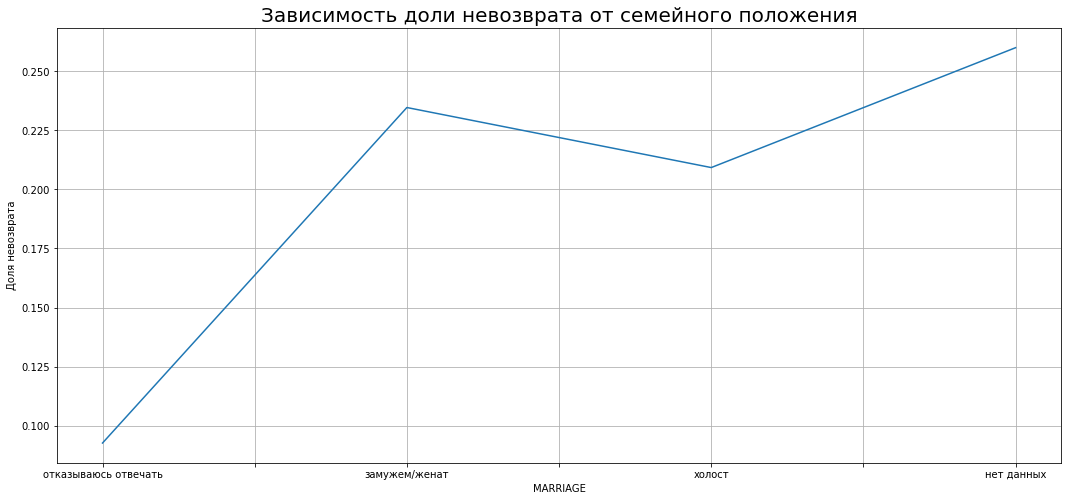

In [56]:
# настраиваем область для графиков
fig, axes = plt.subplots(1, 1, sharey=True, figsize = (18, 8))

df_marriage_pivot['proportion'].plot.line(ax=axes)
axes.set_title('Зависимость доли невозврата от семейного положения', fontsize=20)
axes.set_ylabel('Доля невозврата')
axes.xaxis.set_major_formatter(funcFormatterMarriage)
axes.grid()

<b>Вывод по графикам:</b>

* Доля невозврата у заемщиков с разным сейным статусом отличается.
* Доля невозврата для 1 = 'замужем/женат и 2 = холост не сильно отличается, но все же различия в 2.5% <b>представляется значимым для бизнеса с практической стороны</b>.

### Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

Предположим, что если семейный статус не влияет на возврат кредита, тогда воспользуемся критерием V-Крамера и проверим гипотезы о равенстве нулю критерия V-Крамера.

* Гипотеза H0: семейный статус НЕ влияет на возврат кредита
* Альтернатива H1: семейный статус влияет на возврат кредита

##### Проверка применимости критерия Крамера:

* Нужно, чтобы выборки были достаточно большими: n ≥ 40. 
* Кроме того, необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5, не более, чем в 20% ячеек.

In [57]:
# Нужно, чтобы выборки были достаточно большими: n ≥ 40
print('Условие выполнено :', len(df) > 40)

Условие выполнено : True


Кроме того, необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5, не более, чем в 20% ячеек.

Расчитаем ожидаемые значения для матрицы сопряженности, сгруппируем их в столбцы <b>expected</b>.

Ожидаемые значения меньше 5 записывается так: $(\frac{n_{i+}n_{+j}}{n} < 5)$, где $n_{i+}$ - сумма по строке, $n_{+j}$ - сумма по столбцу.

In [58]:
df_marriage_pivot[('expected', 0)] = df_marriage_pivot[[('default', 0), ('default', 1)]].sum(axis=1) \
                                        * df_marriage_pivot[('default', 0)].sum() / len(df)
df_marriage_pivot[('expected', 1)] = df_marriage_pivot[[('default', 0), ('default', 1)]].sum(axis=1) \
                                        * df_marriage_pivot[('default', 1)].sum() / len(df)

df_marriage_pivot

default       proportion    expected           
               0     1                      0          1
MARRIAGE                                                
0             49     5   0.092593     42.0552    11.9448
1          10453  3206   0.234717  10637.6292  3021.3708
2          12623  3341   0.209283  12432.7632  3531.2368
3            239    84   0.260062    251.5524    71.4476

In [59]:
vkramer_check = np.sum(np.array(df_marriage_pivot['expected'] < 5)) * 100 \
                    / (df_marriage_pivot['expected'].shape[0] * df_marriage_pivot['expected'].shape[1])

print('Процент ячеек где ожидаемое количество < 5 : {:.1f}%'.format(vkramer_check))

Процент ячеек где ожидаемое количество < 5 : 0.0%


Процент меньше 20%, то есть можно применять критерий C-Крамера.

##### Проверка гипотезы Крамера:

In [60]:
df_marriage_pivot['default']

,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [61]:
print ("V-Cramer statistic is: %.4f" % cramers_stat(np.array(df_marriage_pivot['default'])))
print ("p-value:", stats.chi2_contingency(np.array(df_marriage_pivot['default']))[1])

V-Cramer statistic is: 0.0345
p-value: 8.825862457577375e-08


<b>Вывод:</b> нулевая гипотеза отвергается, то есть семейный статус влияет на возврат кредита. Значение статистики V-Крамера небольшое, то есть корреляция есть, но не сильная.

<b>Практическая значимость:</b> как уже говорилось выше 2.5% разницы для групп 1 = 'замужем/женат и 2 = холост не сильно отличается, может быть значимым для бизнеса с практической стороны.

---------------------------------

## Задача 5

Возраст (AGE): 

Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:
* a) о равенстве медианных значений возрастов людей 
* b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Значимы ли полученные результаты с практической точки зрения?

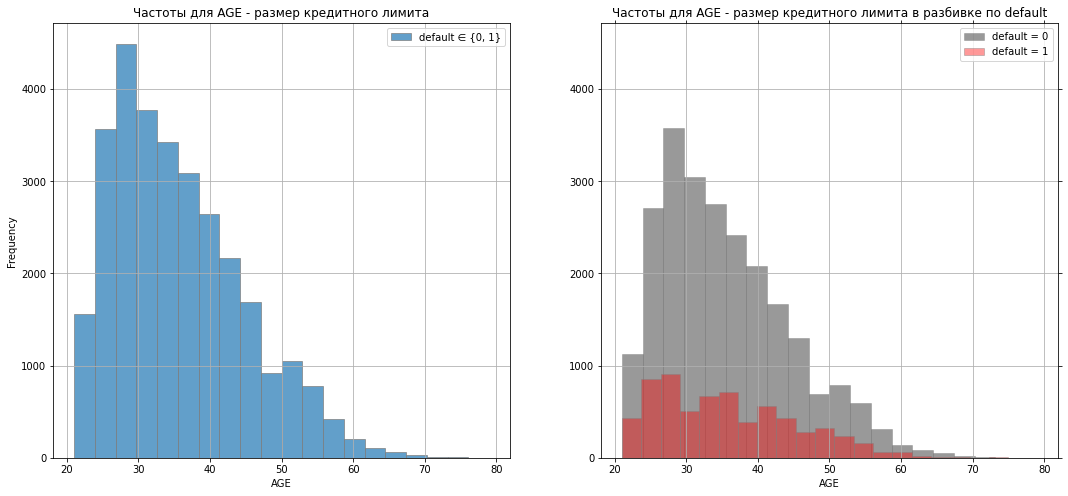

In [62]:
col_analyzed = 'AGE'
col_target = 'default'


# создание фигуры и подграфиков
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


# гистограмма для LIMIT_BAL
df[col_analyzed].plot.hist(bins=20, ax=axes[0], alpha=0.7,  edgecolor='grey', label='default ∈ {0, 1}')
axes[0].set_title('Частоты для {} - размер кредитного лимита'.format(col_analyzed))
axes[0].set_xlabel(col_analyzed)
axes[0].legend()
axes[0].grid()

# гистограмма для LIMIT_BAL в разбивке по default == 0
df.loc[df[col_target] == 0, col_analyzed].plot.hist(bins=20, ax=axes[1], color='black', alpha=0.4, edgecolor='grey',
                                                    label='default = 0')
# гистограмма для LIMIT_BAL в разбивке по default == 1
df.loc[df[col_target] == 1, col_analyzed].plot.hist(bins=20, ax=axes[1], color='red', alpha=0.4,  edgecolor='grey',
                                                    label='default = 1')
axes[1].tick_params(axis='both', reset=True)
axes[1].set_title('Частоты для {} - размер кредитного лимита в разбивке по {}'.format(col_analyzed, col_target))
axes[1].set_xlabel(col_analyzed)
axes[1].legend()
axes[1].grid()

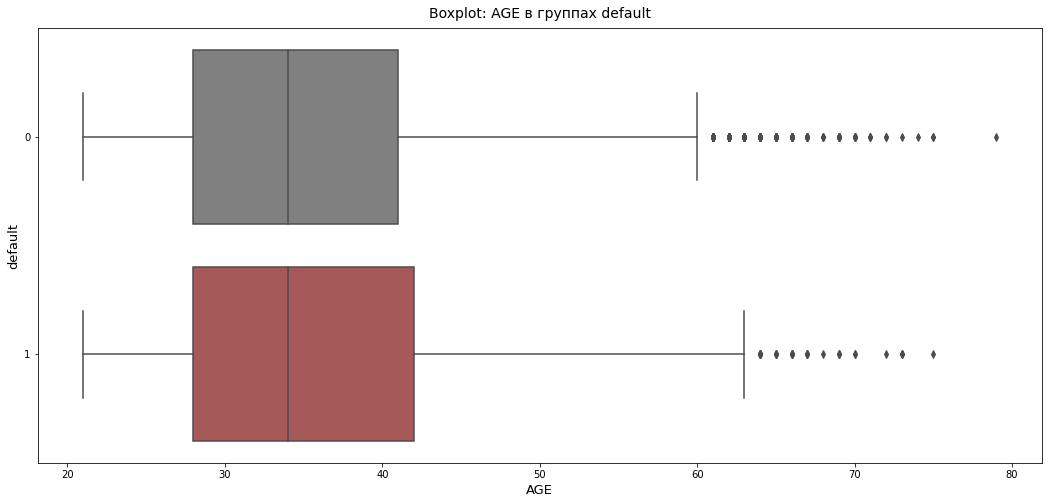

In [63]:
# настраиваем область для графиков
fig, axes = plt.subplots(1, 1, sharey=True, figsize = (18, 8))

# # отображаю boxplot
sns.boxplot(x=col_analyzed, y=col_target, data=df, ax=axes, orient='h', palette=['grey', 'red'], saturation=0.3)
axes.set_xlabel(col_analyzed, fontsize=13)
axes.set_ylabel(col_target, fontsize=13)
axes.set_title(label='Boxplot: {} в группах {}'.format(col_analyzed, col_target), fontdict={'fontsize': 14}, pad=10);

<b>Вывод по графикам:</b>

* Медианные значения для групп примерно совпадают.

### Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:

#### a) о равенстве медианных значений возрастов людей 

Проверять будем следующее:

* Гипотеза H0: медианные значения AGE равны для групп default
* Альтернатива H1: медианные значения AGE отличаются для групп default

In [64]:
# получаем данные по каждой группе default
AGE_d0 = df.loc[df[col_target] == 0, col_analyzed].values
AGE_d1 = df.loc[df[col_target] == 1, col_analyzed].values

In [65]:
# выводим значение медиан для групп
print('Медиана признака {} в группе {}=0 : {:.0f}'.format(col_analyzed, col_target, np.median(AGE_d0))) 
print('Медиана признака {} в группе {}=1 : {:.0f}'.format(col_analyzed, col_target, np.median(AGE_d0)))

Медиана признака AGE в группе default=0 : 34
Медиана признака AGE в группе default=1 : 34


<b>Вывод:</b> медианные значения при прямой оценке совпадают.

Как говорилось в материалах в лекции о доверительных интервалах:
    
«<b>Построение доверительных интервалов на основе бутстрепа</b>

Часто возникает необходимость построить интервальную оценку для некоторой не очень удобной статистики,
про распределение которой ничего не известно. Это могут быть квантили (например, медиана) или сочетание
известных статистик (например, отношение долей).»

То есть для "неудобной" медианы из возможных вариантов интервальной оценки, подходит только бутстреп.

##### Bootstrap для AGE

In [66]:
np.random.seed(0)

AGE_d0_median_scores = np.median(get_bootstrap_samples(AGE_d0, 1000), axis=1)
AGE_d1_median_scores = np.median(get_bootstrap_samples(AGE_d1, 1000), axis=1)

print('95% confidence interval признака LIMIT_BAL в группе default=0 :',  stat_intervals(AGE_d0_median_scores, 0.05))
print('95% confidence interval признака LIMIT_BAL в группе default=1 :',  stat_intervals(AGE_d1_median_scores, 0.05))

95% confidence interval признака LIMIT_BAL в группе default=0 : [34. 34.]
95% confidence interval признака LIMIT_BAL в группе default=1 : [34. 35.]


<b>Вывод:</b> доверительные интервалы пересекаются, то есть медианные значения совпадают.

##### Точечная оценка разности медиан для AGE

In [67]:
print('Разность медиан AGE :', np.median(AGE_d0) - np.median(AGE_d1))

Разность медиан AGE : 0.0


<b>Вывод:</b> разность равна нулю, медианы совпадают.

##### Интервальная оценка разности медиан

In [68]:
delta_AGE_median_scores =  AGE_d0_median_scores - AGE_d1_median_scores

print("95% confidence interval для разности медиан LIMIT_BAL :",  stat_intervals(delta_AGE_median_scores, 0.05))

95% confidence interval для разности медиан LIMIT_BAL : [-1.  0.]


<b>Вывод:</b> доверительный интервал содержит ноль, значения медиан не различаются.

#### Вывод по пункту: a) о равенстве медианных значений возрастов людей

* Медианы совпадают, доверительные интервалы пересекаются, интервальная оценка разности медиан содержит ноль.
* То есть риск невозврата кредита НЕ зависит от возраста.

### Проверьте гипотезы:

#### b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

Воспользуемся <b>перестановочным критерием для независимых выборок</b>

Проверять будем следующее:

* Гипотеза H0: распределения средних AGE равны для групп default
*  Альтернатива H1: распределения средних AGE для групп default отличаются на величину сдвига △ <≠> 0

In [69]:
np.random.seed(0)
print('p-value: {:.5f}'.format(permutation_test(AGE_d0, AGE_d1, max_permutations=1000, alternative='two-sided')))

p-value: 0.01900


p-value больше 0.05 - нулевая гипотеза НЕ отвергается.

#### Вывод по пункту: b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

* Нулевая гипотеза о равестве распределения средних AGE на уровне значимости 0.05 НЕ отвергается.

#### Практическая значимость результата для AGE:

<b>Вывод:</b> практическая значимость результата AGE не существенна, так как разницы в медианах и распределении практически нет.

-----------------